## Cancer Data Analysis


---
Author: Ken Fukuyama <br>
Date: February 21, 2020


### 1. Getting the Data. Loading the Cancer Cells Data.

In [300]:
""" Importing all the libraray needed for the data analysis. """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer() # Making an instance of load_brast_cancer class. The dataset object contains several features, including the description of the dataset, feature names, and target names. 

 - This is a breast cancer dataset from Wisconsin. It has ten primary attributes, and for each attribute,  the mean, standard error, and the largest value are calculated, resulting in 30 attributes in total. By using these features, our goal is to classify the breast mass as either benign (noncancerous) or malignant (cancerous).

In [301]:
print(cancer.DESCR) # This code gives us an overview of the dataset. We see that it contains 30 features, and it has 569 instances in total.

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

#### a. Collecting Input data

In [302]:
df_inputs = pd.DataFrame(cancer.data, columns=cancer.feature_names) # Changing cancer.data (NumPy) that contains input data to pandas dataframe.
                                                                    # cancer.feature_names is a NumPy array with 30 elements. Here we set the columns label with feature names so that the data is more meaningful.
df_inputs.head()                                                    # Displaying the first five rows to get a sense of data in the input datasets (pandas dataframe).

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### b. Collecting output Data

In [303]:
np_targets = cancer.target # Storing targets of cancer data to a NumPy array.
print(np_targets)          # 0 represents Malignant, and 1 represents Benign.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [304]:
np.count_nonzero(np_targets == 1) # There are 212 malignant samples and 357 benign samples.

357

### 2. Preparing the Data 

 - To increase the accuracy and feed the machine learning model with enough data to perform a binary classification correctly, we are going to use the first eight attributes as our input data. Those eight features include the mean of (1) radius (distance from the center to the outer layer), (2) texture (standard deviation of gray-scale values), (3) perimeter (the measurement of outer surface), (4) area (of breast mass), (5) smoothness (local variation in radius lengths), (6)compactness (this can be found by perimeter ^ 2 / area - 1.0), (7) concavity (the severity of hollow portion), and (8) concave point (the number hollow points). I did not think the standard error or the largest value is a better predictor than the mean, so the means of 8 attributes were used.

In [305]:
inputs_data = df_inputs.iloc[:, 0:8] # Storing the first 8 attriubutes to inputs_data.
inputs_data.head()                   # Displaying the fist five rows.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


In [306]:
X_train, X_test, y_train, y_test = train_test_split(inputs_data, np_targets) # We split the input and output data into training and testing subsets. 

"""Since the scales of the inputs data vary significantly, we use standardized the numbers to increase the performance of the machine learning model."""
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 3. Visualizing the data / EDA

#### a. Scatter Plots

In [307]:
"""Storing benign and malignant into different panda dataframes for data visualizaition."""
benign = inputs_data[np_targets == 1] 
malignant = inputs_data[np_targets == 0]

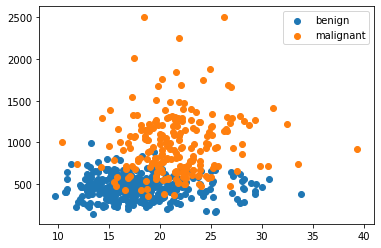

In [308]:
plt.scatter(benign["mean texture"], benign["mean area"], label = "benign");
plt.scatter(malignant["mean texture"], malignant["mean area"], label = "malignant");
plt.legend();

From the scatter plot above, we see that benign breast mass is concentrated in the section where the mean area is less than around 750. On the other hand, we see both benign and malignant across all the range of mean texture.

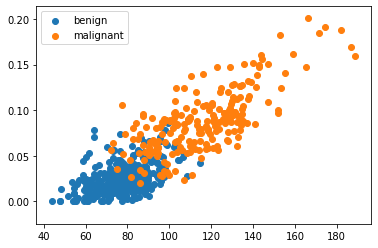

In [309]:
plt.scatter(benign["mean perimeter"], benign["mean concave points"], label = "benign");
plt.scatter(malignant["mean perimeter"], malignant["mean concave points"], label = "malignant");
plt.legend();

The scatter plot above shows that as the numbers of both mean perimeter and mean concave points increase, the breast mass is more likely to be classfied as malignat.

#### b. Histograms.

In [310]:
df_inputs.describe() # This method returns the summary of statistical data for the attributes. 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


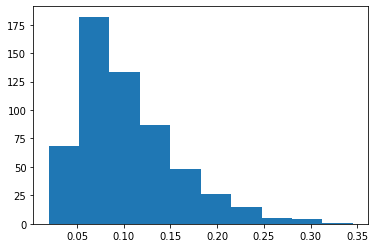

In [311]:
plt.hist(df_inputs["mean compactness"]); # Displaying the histogram for mean compactness of breast mass.

The histogram is skewed to the right, and we see many deviations on the bigger numbers. From the statistical summary earlier, we know that the mean of mean compactness is 0.104, which is a little bit to the right of the median, which is 0.0926.
Because of those large numbers, the mean will be bigger than the median (50th percentile).

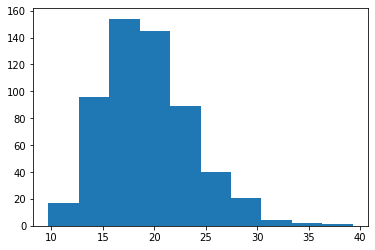

In [312]:
plt.hist(df_inputs["mean texture"]);

The histogram above shows a symmetrical distribution. According to the statistical summary earlier, we know that the mean of mean texture was 19.29, and the median was 18.84. Those two statistics are close to each other because the graph is not skewed.  

### 4. Creating a model.

#### Gradient Boosting Classifier.

This machine learning model uses the gradient boosting classifier, which takes a weak learning algorithm and changes slightly multiple times to increase its performance.

In [313]:
cancer_gpc = GradientBoostingClassifier().fit(X_train, y_train) # We train the model using X_train and y_train subsets.

### 5. Assessing the Model's Accuracy on Test Data.

In [314]:
print(cancer_gpc.score(X_test, y_test)) # Displaying the accuracy with X_test and y_test.

0.951048951048951


The average accuracy of 10 running tests was 94.266%, with a minimum of 91.608% and a maximum of 97.203%. The percentage represents how well the machine learning algorithm correctly predicted the binary label (malignant or benign). The accuracy is high, so we can conclude that this machine learning algorithm is reliable.